In [1]:
import pandas as pd 
import numpy as np

В этом задании Вам необходимо предсказать **является ли абонент мультисимером** (имеет 2+ СИМ-карты). 


### Задание

Проведите преодобработку и анализ фичей, постройте модель бинарной классификации, оцените ее точность, обоснуйте выбор метрики и не забудьте сделать предсказания для абонентов, у которых поле **'target'** содержит значение **'NaN'**.

**1. Считайте датасет и проведите первичный анализ**

*Описание полей, как и сам датасет. доступны внутри файла multisim_dataset*

**2. Постройте простейшую модель (*baseline*) и сделайте выводы**

*Можно использовать любые модели*

**3. Визуализируйте значения фичей в зависимости от таргета или других фич**

*Интерпретируйте полученные результаты*

**4. Постройте модель с учетом прошлых пунктов**

**5. Сделайте предсказания и выведите значения метрик (самостоятельно написав основные функции, например, через confusion matrix)**

**6. Опишите следующие шаги, которые Вы бы решили делать в следующих итерациях проекта**

***_------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------_***

***-----------------------------------------------------------------------------------------------------------------------------------------------------------------------Автор: Евстифеев Алексей
    -----------------------------------------------------------------------------------------------------------------------------------------------------------------------email: Raz1nad@yandex.ru***

# 1. Считываем датасет    ___------------------------------------------------___

***Загрузим датасет, посмотрим на данные***

In [2]:
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
from seaborn import heatmap
from seaborn import countplot

In [3]:
data = pd.read_excel('multisim_dataset.xlsx') # Загружаем датасет

In [4]:
pd.set_option('display.max_columns',100)      # Увеличиваем количество столбцов ДФ при отображении
data.head()                                   # Посмотрим, что загрузили

,id,mg_traffic_in,tp_code,num_voice_out,tp_change_date,uniq_calls_cnt,age_cat,tech_sms_cnt_3m,tech_sms_cnt_6m,called_ctn_all_group,device_cost,traf_kb,sim_type,gender_male_prob,complex_value_sum,complex_value_size,imei_cnt,main_balance_adjust_minus_cnt,state_code,macro_state,time_onnet,sum_recharges_3m,year,month,target
0,101,2.98,1.0,17.0,NaT,53,4,657.0,1917.0,0.0,4955.0,6233088,DualSim,0.908237,27287.666667,4.666667,1.0,NaN,AST,1,3977,809.00,2019,1,NaN
1,102,1.82,2.0,97.0,NaT,82,5,0.0,22.0,5.0,6990.0,47462400,DualSim,0.871256,16611.000000,1.666667,1.0,NaN,ORB,1,1617,622.00,2019,1,NaN
2,103,0.00,3.0,22.0,NaT,58,3,162.0,246.0,0.0,13689.0,0,DualSim,0.928517,20658.000000,1.000000,1.0,NaN,VIP,1,2703,366.04,2019,1,1.0
3,104,0.00,4.0,30.0,NaT,61,10,NaN,NaN,0.0,490.0,0,DualSim,0.644491,18045.000000,2.666667,1.0,NaN,KCH,1,1153,1122.58,2019,1,1.0
4,105,0.80,5.0,29.0,NaT,49,0,66.0,130.0,1.0,16051.0,0,DualSim,0.949505,9032.000000,1.000000,1.0,1.333333,STV,1,2174,633.20,2019,1,0.0


In [5]:
data.describe()

,id,mg_traffic_in,tp_code,num_voice_out,uniq_calls_cnt,age_cat,tech_sms_cnt_3m,tech_sms_cnt_6m,called_ctn_all_group,device_cost,traf_kb,gender_male_prob,complex_value_sum,complex_value_size,imei_cnt,main_balance_adjust_minus_cnt,macro_state,time_onnet,sum_recharges_3m,year,month,target
count,90000.000000,90000.000000,60347.000000,30000.000000,90000.000000,90000.000000,61695.000000,61695.000000,89916.000000,88035.000000,9.000000e+04,90000.000000,89946.000000,89946.000000,89490.000000,29910.000000,90000.000000,90000.000000,90000.00000,90000.000000,90000.000000,73249.000000
mean,15100.500000,26.259969,214.879663,59.208300,89.164800,6.035033,290.413567,603.395915,1.752269,6297.207633,3.838716e+08,0.507622,21274.900490,2.112951,1.345089,1.499488,1.383700,2850.285833,898.82296,2018.666667,5.000000,0.496034
std,8660.302146,92.278711,239.087220,75.254333,84.453874,2.597720,388.273102,763.069617,2.192029,6796.624127,1.430268e+09,0.346736,16214.049069,1.557484,3.737140,1.409520,0.486289,1703.560338,1974.42211,0.471407,4.966582,0.499988
min,101.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,-99.000000,0.000000e+00,0.006721,0.000000,0.000000,1.000000,1.000000,1.000000,182.000000,-9004.00000,2018.000000,1.000000,0.000000
25%,7600.750000,0.220000,54.000000,12.000000,40.000000,4.000000,34.000000,76.000000,0.000000,457.000000,0.000000e+00,0.140512,13967.666667,1.000000,1.000000,1.000000,1.000000,1296.000000,300.00000,2018.000000,1.000000,0.000000
50%,15100.500000,3.520000,136.000000,34.000000,66.000000,6.000000,175.000000,369.000000,1.000000,4990.000000,0.000000e+00,0.528848,18207.666667,1.666667,1.000000,1.000000,1.000000,2634.000000,680.01500,2019.000000,2.000000,0.000000
75%,22600.250000,15.352500,299.000000,77.000000,110.000000,8.000000,433.000000,900.000000,3.000000,9628.000000,3.377459e+07,0.861485,24500.000000,3.000000,1.000000,1.833333,2.000000,4469.000000,1220.00000,2019.000000,12.000000,1.000000
max,30100.000000,5964.370000,1406.000000,1129.000000,2530.000000,10.000000,18459.000000,20303.000000,32.000000,90010.000000,3.711528e+10,0.992713,378760.000000,14.333333,547.000000,65.000000,2.000000,7029.000000,179482.67000,2019.000000,12.000000,1.000000


***В глаза бросается большие пропуски значений времени (NaT) столбца tp_change_date. Удалим столбец из датасета. Так же бесполезен id клиента, удаляем***

In [6]:
data.drop(['tp_change_date', 'id'], axis='columns', inplace=True)

# 2. BASELINE   ___------------------------------___

***В качестве базовой модели попробуем отнести всех абонентов, имеющих телефон со слотом под две и более сим карты, к мультисимочным:***

In [7]:
data['sim_type'].unique()

array(['DualSim', nan, 'MonoSim'], dtype=object)

In [8]:
mask = np.isnan(data['target']) == True
data_for_baseline = data[~mask]
mask_ = pd.isnull(data_for_baseline['sim_type']) == True
data_for_baseline = data_for_baseline[~mask_]

In [9]:
data_for_baseline = data_for_baseline[['sim_type', 'target']]

In [10]:
# Заполним предсказания на основе кол-ва сим карт в телефоне
data_for_baseline['target_pred'] = np.where(data_for_baseline['sim_type'] == 'DualSim', 1, 0)

In [11]:
data_for_baseline.head(3)

,sim_type,target,target_pred
2,DualSim,1.0,1
3,DualSim,1.0,1
4,DualSim,0.0,1


In [12]:
# считаем кол-во верных и ошибочных предсказаний
data_for_baseline.reset_index(inplace = True)
right_preds, wrong_preds = 0, 0
for i in range(len(data_for_baseline)):
    if int(data_for_baseline['target'][i]) == int(data_for_baseline['target_pred'][i]):
        right_preds += 1
    else:
        wrong_preds += 1

In [13]:
print ('Baseline Успешные прогнозы', right_preds)
print ('Baseline Yеверные прогнозы', wrong_preds)
print ('Baseline Точность', np.round(right_preds/(right_preds+wrong_preds),2))

Baseline Успешные прогнозы 38081
Baseline Yеверные прогнозы 33920
Baseline Точность 0.53


# 3. Визуализируем признаковое пространство   ___------------------------------___

***Взглядем на баланс классов в нашем датасете:***

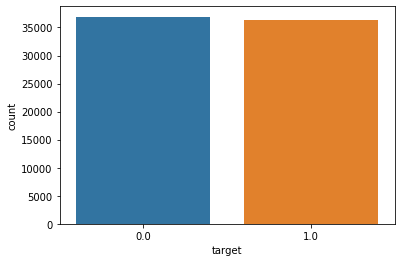

In [14]:
countplot(data.target)

***Баланс классов практически идеальный***

***Посмотрим на вещественные признаки "main_balance_adjust_minus_cnt" (кол-во корректировок баланса),"num_voice_out" (кол-во исходящих)
uniq_calls_cnt (кол-во уникальных контрагентов):***

***Посмотрим на гистрограмму плотности распеределения***

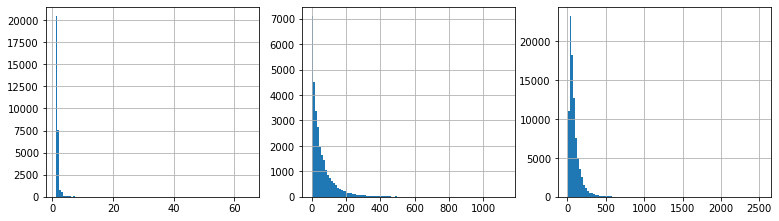

In [15]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13,3.5))
hist_1 = data['main_balance_adjust_minus_cnt'].hist(bins=100, ax = ax1)
hist_2 = data['num_voice_out'].hist(bins=100, ax = ax2)
hist_3 = data['uniq_calls_cnt'].hist(bins=100, ax = ax3)
plt.show()

***Видим, что максимальные значения, это какие-то выбросы. Посмотрим более детально на плотность распределения***

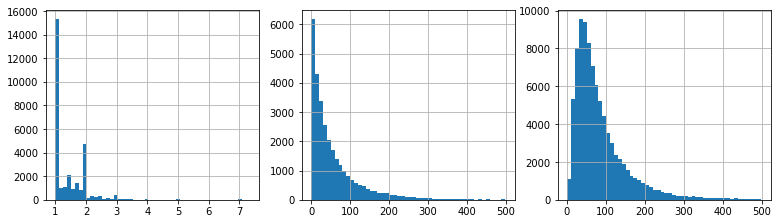

In [16]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13,3.5))
hist_1 = data['main_balance_adjust_minus_cnt'][data.main_balance_adjust_minus_cnt < 8.].hist(bins=50, ax = ax1)
hist_2 = data['num_voice_out'][data.num_voice_out < 500.].hist(bins=50, ax = ax2)
hist_3 = data['uniq_calls_cnt'][data.uniq_calls_cnt < 500.].hist(bins=50, ax = ax3)

plt.show()

***Будем заполнять все пропущенные значение вещественных признаков медианой***

In [17]:
# Вещественные признаки:
real_features = ['main_balance_adjust_minus_cnt','num_voice_out','tech_sms_cnt_3m','tech_sms_cnt_6m',
                 'device_cost','complex_value_sum','complex_value_size','imei_cnt','main_balance_adjust_minus_cnt'],
med = []
# Считаем медианные значение каждого признака:
med.append(np.median(data['main_balance_adjust_minus_cnt'][np.isnan(data.main_balance_adjust_minus_cnt) == False]))
med.append(np.median(data['num_voice_out'][np.isnan(data.num_voice_out) == False]))
med.append(np.median(data['tech_sms_cnt_3m'][np.isnan(data.tech_sms_cnt_3m) == False]))
med.append(np.median(data['tech_sms_cnt_6m'][np.isnan(data.tech_sms_cnt_6m) == False]))
med.append(np.median(data['device_cost'][np.isnan(data.device_cost) == False]))
med.append(np.median(data['complex_value_sum'][np.isnan(data.complex_value_sum) == False]))
med.append(np.median(data['complex_value_size'][np.isnan(data.complex_value_size) == False]))
med.append(np.median(data['imei_cnt'][np.isnan(data.imei_cnt) == False]))
med.append(np.median(data['main_balance_adjust_minus_cnt'][np.isnan(data.main_balance_adjust_minus_cnt) == False]))
# Заполняем пропуски медианой:
for i in range(len(med)):
    data[real_features[0][i]].fillna(med[i], inplace = True)

***Посмотрим на корреляцию признаков***

Text(0.5, 1, 'Correlation Matrix')

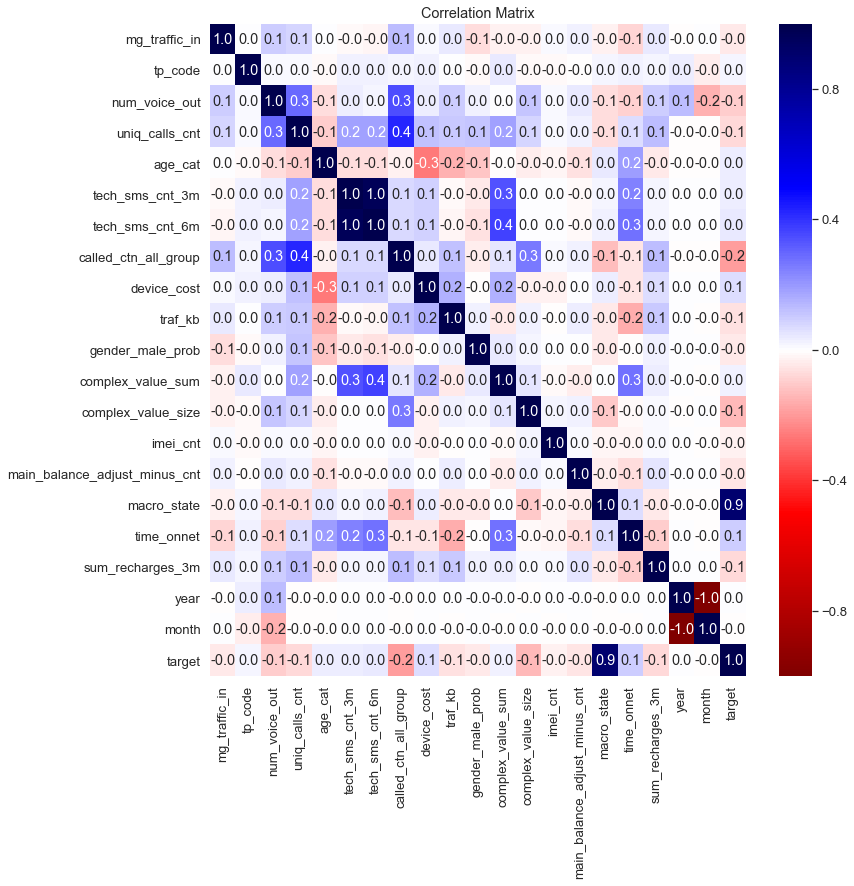

In [18]:
import seaborn as sns
sns.set(font_scale=1.2)
fig,axes=plt.subplots(figsize=(12,12))
heatmap(data.corr(), cmap='seismic_r', annot=True, fmt='0.1f', vmax=1, vmin=-1)
axes.set_title('Correlation Matrix')

***Видим, что tech_sms_cnt_3m хорошо коррелирует с tech_sms_cnt_6m, это логично по сути признака.
Так же очень сильно коррелируют month и year, дальше разберемся почему.
К целевому признаку отличная корреляция у признака macro_state (макро-регион)***

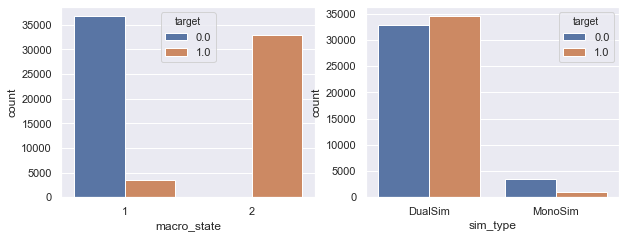

In [19]:
sns.set()
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,3.5))
countplot(x=data['macro_state'], data=data, ax=ax1, hue="target")
countplot(x=data['sim_type'], data=data, ax=ax2, hue="target")

***Видим, что почти у всех абонентов с macrostate (макрорегион) = 2 - две сим карты. Интересно заметить, что у некоторых абонентов с односимочным телефоном, так же две сим карты (возможно использование нескольких устройств)***

***Посмотрим на кол-во уникальных значений категориальных признаков***

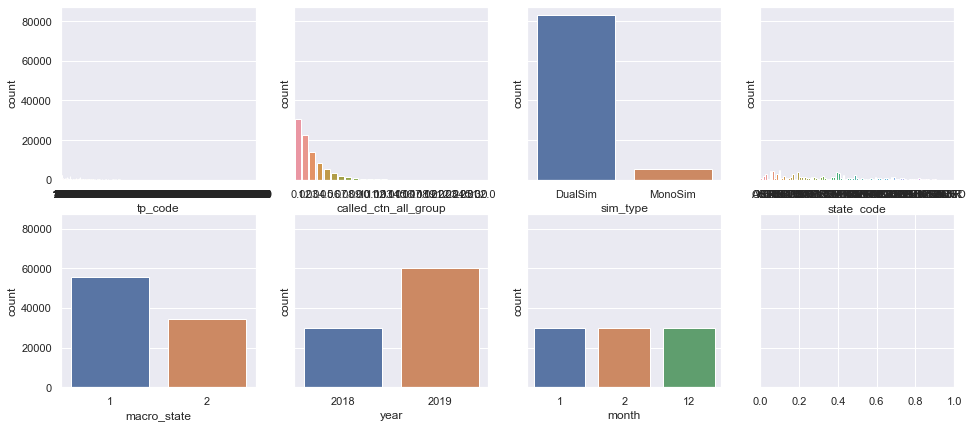

In [20]:
cat_features = ['tp_code','called_ctn_all_group', 'sim_type', 'state_code', 'macro_state', 'year', 'month']
fig, axes = plt.subplots(2, 4, sharey=True, figsize=(16, 7))

for i in range(len(cat_features)):
    countplot(x=cat_features[i], data=data, ax=axes[int(i/4), int(i % 4)])

***Кол-во уникальных значений признака 'tp_code' зашкаливает. Посмотрим его значение и удалим признак***

In [21]:
print ('Кол-во уникальных значений признака "tp_code":', len(data['tp_code'].unique()))
data.drop(['tp_code'], axis='columns', inplace=True)

Кол-во уникальных значений признака "tp_code": 1407


***Скорее всего year и month это шумовые признаки, которые никакой информации не несут. Это всего лишь дата добавления абонента в датасет. Видим, что абоненты добавлялись в датасет с декабря 2018го по февраль 2019го, отсюда и корреляция месяца с годом, полученная выше***

In [22]:
data.drop(['year', 'month'], axis='columns', inplace=True)

### Разделим датасет на обучение (где значение target определено) и на новые данные (где нужно определить значение target)

In [23]:
mask = np.isnan(data['target']) == True
data_new, data_train = data[mask], data[~mask]  # делим датафрейм

In [24]:
# Сделаем новые индексы
data_new.index = np.arange(len(data_new))
data_train.index = np.arange(len(data_train))

### Кодируем категориальные признаки:

In [25]:
from sklearn.preprocessing import OneHotEncoder
import scipy
hot = OneHotEncoder()

***Наверняка значения "age_cat"(возрастная категория) расставлены по логике: чем выше возраст, тем выше категория, или наоборот. То есть, можно будет сравнивать их по величине 1<4<10 ...
Не будем переходить к бинарным признакам здесь. Оставим значения в integer. 
Macro_state также не будем кодировать, т.к всего два возможных значения без пропусков в данных***

In [26]:
categorical_features_for_coding = ['state_code','called_ctn_all_group','sim_type']

***Заполним все NaN в категориальных признаках на какое-то значение, например, строку 'Nan' или -1***

In [27]:
for data_ in [data_new, data_train]:
    for feature in categorical_features_for_coding:                            # В категориальных признаках:
        if isinstance(data_[feature][0], str) == True:                         # Если это строка
            data_[feature].fillna('Nan', inplace = True)                       # заменяем Nan на строковое значение
        else:
            data_[feature].fillna( np.max(data_[feature])+1., inplace = True)  # если тип числовой, заменяем на макс. значение +1

***Кодируем категориальные признаки:***

In [28]:
encoded_train = []
encoded_new=[]
for feature in categorical_features_for_coding:
    hot = OneHotEncoder()
    encoded_train.append( hot.fit_transform(np.array(data_train[feature]).reshape(-1,1)) )
    encoded_new.append(( hot.transform(np.array(data_new[feature]).reshape(-1,1)) ))

In [29]:
print ('\033[1mПолучившиеся размерности векторов новых бинарных признаков:\033[0m')
for i in range(len(encoded_train)):
    print ('data_train', encoded_train[i].shape,'/\033[1m', categorical_features_for_coding[i],
           '\033[0m/ data_new:', encoded_new[i].shape)

Получившиеся размерности векторов новых бинарных признаков:
data_train (73249, 85) / state_code / data_new: (16751, 85)
data_train (73249, 28) / called_ctn_all_group / data_new: (16751, 28)
data_train (73249, 3) / sim_type / data_new: (16751, 3)


In [30]:
encoded_cat_features_train = scipy.sparse.hstack(encoded_train)   # Объединяем в одну матрицу кодированные кат.признаки
encoded_cat_features_new = scipy.sparse.hstack(encoded_new)       # Объединяем в одну матрицу кодированные кат.признаки

***Создадим матрицу из остальных признаков (не кодированных категориальных) и соединим с кодированной***

In [31]:
# Делаем матрицу из остальных признаков:
data_other_features_new = []        # список с матрицами признаков для новой выборки
data_other_features_train = []      # список с матрицами признаков для обучающей выборки
for column in data_train.columns:                                      # для всех признаков
    # если не катег. кодидорванный и не целевой признак, добавляем в список:
    if (column not in categorical_features_for_coding) and column not in ['target']:         
        data_other_features_train.append(scipy.sparse.csr_matrix(data_train[column].values).T)
        data_other_features_new.append(scipy.sparse.csr_matrix(data_new[column].values).T)      

In [32]:
# Объединяем в одну матрицу остальные признаки:
other_features_train = scipy.sparse.hstack(data_other_features_train)   
other_features_new = scipy.sparse.hstack(data_other_features_new)

In [33]:
# Объединяем в конечное признаковое пространство ост.признаки и кодир.кат.признаки:
X = scipy.sparse.hstack([other_features_train, encoded_cat_features_train])
X_new = scipy.sparse.hstack([other_features_new, encoded_cat_features_new])

In [34]:
y = np.array(data_train['target'])
y_new = np.array(data_new['target'])

***Разделим объекты с ответами на тестовую и обучающую части. По заданию нужно написать функции оценки метрик (пункт 5), поэтому оставим 1% выборки для этого***

In [35]:
# Разделим нашу выборку на обучение и тест:
from sklearn import model_selection
(X_train, X_test, y_train, y_test) = model_selection.train_test_split(X, y, test_size=0.01, shuffle = True)

# 2, 4. Создаём модель      ___------------------------------------------------___

## Модель Решающее дерево. Decision Tree

In [36]:
from numpy import asmatrix
from matplotlib import pylab
import matplotlib

***Судя по всему для данной задачи не нужна сложная модель, будем использовать просто решающее дерево***

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
depth_range =  np.geomspace(1, 1000, 10)        # минимум глубина, максимум глубина дерева, кол-во элементов
criterion = ['entropy', 'gini']
cv = 3                                          # Кол-во фолдов кросс-валидации

***Метрику качества будем использовать 'accuracy' (доля верных ответов), т.к в задании не указано, для чего будет использоваться модель, и зачем нужно отделять односимочных абонентов от мултисимочных. Можно предположить, что требуется одинаково хорошо опрелять и односимочника, и мультисимочника, чтобы давать им какие-то определенные предложения, скидки, бонусы и т.п., которые будут интересны именно им, как владельцам только одной или двух сим карт*** 

In [39]:
def Tree_params(critetion, depth_range, X_train, y_train,cv):
    # ФУНКЦИЯ ОПРЕДЕЛЯЕТ НАИЛУЧШИЕ ПАРАМЕТРЫ ДЕРЕВА                   
    scoring = []     
    # Задаём диапазон макс.глубины дерева геометрической прогрессией, чтобы увеличивать шаг с ростом значения:
    max_depths = np.geomspace(1, 10000, 10,dtype = int)  
    for depth in max_depths:
        for criter in criterion:
            Tree = DecisionTreeClassifier(criterion = criter, max_depth = depth) 
            score = model_selection.cross_val_score(Tree, X_train, y_train, 
                                                     scoring = 'accuracy', cv = 3)   
            scoring.append(score)
    scoring = asmatrix(scoring)
    first = int(0)
    last = int((len(scoring.mean(axis = 1))/len(criterion)))
    step = int(last)
    for i in range(len(criterion)):
        pylab.plot(max_depths, scoring.mean(axis = 1)[first:last], marker='.', label=criterion[i])
        first = last           # начальное становится последним
        last += step           # увеличиваем конечное значение на значение шага
        fig = plt.gcf()
        fig.set_size_inches(10, 4, forward=True)
    pylab.grid(True)
    pylab.xlabel('max_depths')
    pylab.ylabel('Accuracy_score')
    pylab.title('Parameters selection for Decision Tree')
    pylab.legend(loc='best', title = 'criterion')
    # Определяем лучшие параметры:
    scoring_max, criterion_best, depth_best = 0, 0, 0
    for i in range(len(criterion)):
        for d in range(len(max_depths)):
            if scoring.mean(axis = 1)[i+d*len(criterion)] > scoring_max:
                scoring_max = scoring.mean(axis = 1)[i+d*len(criterion)]
                criterion_best = criterion[i]
                depth_best = max_depths[d]
                
    print ('\nЛучшая глубина дерева из анализируемых точек:', ' ',depth_best,' Лучший критерий:', 
           ' ',criterion_best, 'Accuracy:', scoring_max, sep = '')
    return(criterion_best, depth_best)


Лучшая глубина дерева из анализируемых точек: 464 Лучший критерий: entropyAccuracy:[[0.98371394]]


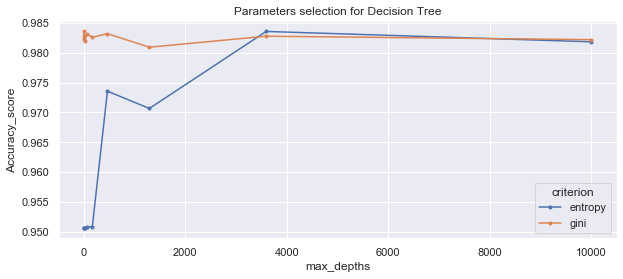

In [40]:
criterion_best, depth_best = Tree_params(criterion, depth_range, X_train, y_train,cv)

***Видим, что по энтропийному критерию лучше не ограничивать глубину дерева. По критерию джини наблюдаем практичеки прямую параллельную оси абсцисс, на уровне доли верных ответов 98.2% при любом ограничении глубины***

***Не будем ограничивать глубину дерева и возьмём энтропийный критерий для конечной модели***

In [41]:
Tree = DecisionTreeClassifier(criterion = 'entropy')  # создаём модель

In [42]:
Tree.fit(X_train, y_train)                            # обучаем

DecisionTreeClassifier(criterion='entropy')

In [43]:
score = model_selection.cross_val_score(Tree, X_train, y_train, scoring = 'accuracy', cv = cv)  

In [44]:
print ('\033[1mAccuracy score по кросс-валидации:', np.round(np.mean(score),4),'\033[0m')

Accuracy score по кросс-валидации: 0.9832 


***Получился неплохой результат***

# 5. Создаём функции метрик и даём вектор ответов на целевой признак с NaN

In [45]:
# Инициализируем переменные:
TP = 0  # True Positive
FP = 0  # False Positive
TN = 0  # True Negative
FN = 0  # False Negative
for i in range(len(y_test)):
    if Tree.predict_proba(X_test)[:,1][i] == 1 and y_test[i] == 1 :  # True Positive
        TP += 1
    elif Tree.predict_proba(X_test)[:,1][i] == 1 and y_test[i] == 0: # False Positive
        FP += 1
    elif Tree.predict_proba(X_test)[:,1][i] == 0 and y_test[i] == 0: # True Negative
        TN += 1
    elif Tree.predict_proba(X_test)[:,1][i] == 0 and y_test[i] == 1: # False Negative
        FN += 1

***Функции базовых метрик***

In [46]:
# Доля верных ответов:
def accuracy(TP, FP, TN, FN):
    accuracy_ = (TP + TN) / (TP + FP + TN + FN)
    return (accuracy_)
# Точность:
def precision(TP, FP):
    precision_ = TP / (TP + FP)
    return (precision_)
# Полнота:
def recall(TP, FN):
    recall_ = TP / (TP + FN)  
    return (recall_)

In [47]:
print ('\033[1mДоля верных ответов на тестовой выборке:', accuracy(TP, FP, TN, FN),'\nТочность:\
', precision(TP, FP), '\nПолнота:', recall(TP, FN),'\033[0m')

Доля верных ответов на тестовой выборке: 0.9959072305593452 
Точность: 1.0 
Полнота: 0.9921465968586387 


***На тестовой выборке почти все ответы алгоритма даны верно***

***Предсказания алгоритма на новых признаках:***

In [48]:
Tree.predict_proba(X_new)[:,1] 

array([1., 0., 0., ..., 0., 0., 1.])

***Посмотрим, сколько элементов каждого класса указала модель на новых данных:***

In [49]:
from collections import Counter
Counter(Tree.predict_proba(X_new)[:,1] )

Counter({1.0: 3520, 0.0: 13231})

***Указано подавляющее большинство односимочников, хотя классы в данных на которых мы обучались были вполне сбалансированы. Надеемся, модель не ошибается :)***

# 6. Что делать дальше

***Обзванивать мультисимеров, предлагать отказаться от второй сим-карты, подстроив тариф под нужды и желания мультисимера.
Односимерам за верность компании - подарочки :D***